## Lead Scoring Assignment
Student: Pham Thieu Quan (phamthieuquan.ivf@gmail.com)

In [165]:
# Import the pandas library for data manipulation and analysis
import pandas as pd

# Import the numpy library for numerical operations and array manipulation
import numpy as np

# Import matplotlib.pyplot and seaborn for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import KMeans from sklearn.cluster for unsupervised clustering
from sklearn.cluster import KMeans

# Import train_test_split from sklearn.model_selection for data splitting
from sklearn.model_selection import train_test_split

# Import StandardScaler from sklearn.preprocessing for data scaling
from sklearn.preprocessing import StandardScaler

# Import statsmodels.api as sm for statistical modeling and feature selection
import statsmodels.api as sm

# Import LogisticRegression from sklearn.linear_model for logistic regression modeling
from sklearn.linear_model import LogisticRegression

# Import RFE from sklearn.feature_selection for recursive feature elimination
from sklearn.feature_selection import RFE

# Import variance_inflation_factor from statsmodels.stats.outliers_influence for VIF calculation
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Suppress warning messages (optional)
import warnings
warnings.filterwarnings('ignore')

# Set pandas display options for better readability
pd.options.display.max_columns = None  # Show all columns
pd.options.display.max_rows = 150      # Show 150 rows
pd.options.display.float_format = '{:.2f}'.format  # Format floats to 2 decimal places


#### Just import data and describe it from General to details¶

In [172]:
#Reading the data file using pandas
df = pd.read_csv('Leads.csv')

df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.00,0,0.00,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.00,15.00,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.00,674,2.50,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.00,15.00,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.00,1532,2.00,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.00,20.00,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.00,305,1.00,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.00,17.00,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.00,1428,1.00,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.00,18.00,No,No,Modified


In [173]:
df.duplicated().sum()

0

In [174]:
df.describe()


,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.00,9240.00,9103.00,9240.00,9103.00,5022.00,5022.00
mean,617188.44,0.39,3.45,487.70,2.36,14.31,16.34
std,23406.00,0.49,4.85,548.02,2.16,1.39,1.81
min,579533.00,0.00,0.00,0.00,0.00,7.00,11.00
25%,596484.50,0.00,1.00,12.00,1.00,14.00,15.00
50%,615479.00,0.00,3.00,248.00,2.00,14.00,16.00
75%,637387.25,1.00,5.00,936.00,3.00,15.00,18.00
max,660737.00,1.00,251.00,2272.00,55.00,18.00,20.00


#### Data Quality Review:

- No Duplicate Data: That's great news!
- Missing Values: Several columns lack data. We'll need to either remove these missing entries or fill them in strategically.
- Redundant Identifiers: Both "Prospect ID" and "Lead Number" seem to identify the same individual. Keeping one and dropping the other will clear things up.
- Inconvenient Names: Those long column names are tough to handle! Renaming them to be more concise will make things easier.
- "Select" as Missing Value: Treat "Select" in categorical columns as if it's missing data, since it indicates no selection was made.

### Data Cleaning

In [175]:
# Describes the intention of the code block: converting column names to snake_case.
df.columns = df.columns.str.replace(' ', '_').str.lower()

# Performs the column name conversion
df.columns

Index(['prospect_id', 'lead_number', 'lead_origin', 'lead_source',
       'do_not_email', 'do_not_call', 'converted', 'totalvisits',
       'total_time_spent_on_website', 'page_views_per_visit', 'last_activity',
       'country', 'specialization', 'how_did_you_hear_about_x_education',
       'what_is_your_current_occupation',
       'what_matters_most_to_you_in_choosing_a_course', 'search', 'magazine',
       'newspaper_article', 'x_education_forums', 'newspaper',
       'digital_advertisement', 'through_recommendations',
       'receive_more_updates_about_our_courses', 'tags', 'lead_quality',
       'update_me_on_supply_chain_content', 'get_updates_on_dm_content',
       'lead_profile', 'city', 'asymmetrique_activity_index',
       'asymmetrique_profile_index', 'asymmetrique_activity_score',
       'asymmetrique_profile_score',
       'i_agree_to_pay_the_amount_through_cheque',
       'a_free_copy_of_mastering_the_interview', 'last_notable_activity'],
      dtype='object')

In [176]:
# shorten column names
df.rename(columns = {'totalvisits': 'total_visits', 'total_time_spent_on_website': 'time_on_website', 
                    'how_did_you_hear_about_x_education': 'source', 'what_is_your_current_occupation': 'occupation',
                    'what_matters_most_to_you_in_choosing_a_course' : 'course_selection_reason', 
                    'receive_more_updates_about_our_courses': 'courses_updates', 
                     'update_me_on_supply_chain_content': 'supply_chain_content_updates',
                    'get_updates_on_dm_content': 'dm_content_updates',
                    'i_agree_to_pay_the_amount_through_cheque': 'cheque_payment',
                    'a_free_copy_of_mastering_the_interview': 'mastering_interview'}, inplace = True)

df.head(1)

,prospect_id,lead_number,lead_origin,lead_source,do_not_email,do_not_call,converted,total_visits,time_on_website,page_views_per_visit,last_activity,country,specialization,source,occupation,course_selection_reason,search,magazine,newspaper_article,x_education_forums,newspaper,digital_advertisement,through_recommendations,courses_updates,tags,lead_quality,supply_chain_content_updates,dm_content_updates,lead_profile,city,asymmetrique_activity_index,asymmetrique_profile_index,asymmetrique_activity_score,asymmetrique_profile_score,cheque_payment,mastering_interview,last_notable_activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.00,0,0.00,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.00,15.00,No,No,Modified


In [177]:
df.drop('prospect_id', axis = 1, inplace = True)

#### Replace "Select" with null

In [178]:
# Filter all columns with non-numeric data types
df_obj = df.select_dtypes(include='object')

# Identify columns containing the substring "Select"
s = lambda x: x.str.contains('Select', na=False)
l = df_obj.columns[df_obj.apply(s).any()].tolist()
print (l)

['specialization', 'source', 'lead_profile', 'city']


In [179]:
# Identify and select columns with entries containing "Select"
sel_cols = ['specialization', 'source', 'lead_profile', 'city']

# Replace "Select" values with NaN
df[sel_cols] = df[sel_cols].replace('Select', np.NaN)

In [180]:
# Calculate percentage of null values for each column
(df.isnull().sum() / df.shape[0]) * 100

lead_number                     0.00
lead_origin                     0.00
lead_source                     0.39
do_not_email                    0.00
do_not_call                     0.00
converted                       0.00
total_visits                    1.48
time_on_website                 0.00
page_views_per_visit            1.48
last_activity                   1.11
country                        26.63
specialization                 36.58
source                         78.46
occupation                     29.11
course_selection_reason        29.32
search                          0.00
magazine                        0.00
newspaper_article               0.00
x_education_forums              0.00
newspaper                       0.00
digital_advertisement           0.00
through_recommendations         0.00
courses_updates                 0.00
tags                           36.29
lead_quality                   51.59
supply_chain_content_updates    0.00
dm_content_updates              0.00
l

#### Observations:

- A significant number of columns contain missing values, mainly in demographic information (country, city, specialization), lead scoring (lead_quality, lead_profile), and engagement (asymmetrique_* indices).
- Some potentially crucial features like lead_source and specialization have moderate missingness, which might require careful imputation or exclusion depending on its impact on your analysis.
- Columns with low missingness can be directly used for further analysis.

#### Recommendations:

- Analyze the distribution of missing values within each column (missing completely at random, missing not at random) to guide imputation strategies.
- Explore the relationship between missing values and other variables to assess potential biases.
- Decide whether to impute missing values based on the analysis and the importance of each feature for your goals.
- Consider dropping columns with a very high percentage of missing values if imputation is not feasible or appropriate.

#### Drop columns that have null values > 40% or Sales generated columns

In [181]:
df.drop(['source', 'lead_quality', 'lead_profile', 'asymmetrique_activity_index', 
                      'asymmetrique_profile_index', 'asymmetrique_activity_score', 'asymmetrique_profile_score',
        'tags', 'last_activity', 'last_notable_activity'], 
        axis = 1, inplace = True)

df.head(1)

,lead_number,lead_origin,lead_source,do_not_email,do_not_call,converted,total_visits,time_on_website,page_views_per_visit,country,specialization,occupation,course_selection_reason,search,magazine,newspaper_article,x_education_forums,newspaper,digital_advertisement,through_recommendations,courses_updates,supply_chain_content_updates,dm_content_updates,city,cheque_payment,mastering_interview
0,660737,API,Olark Chat,No,No,0,0.00,0,0.00,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,NaN,No,No


In [182]:
# Examine the remaining data
# Calculate the percentage of null values for each column
(df.isnull().sum() / df.shape[0]) * 100

lead_number                     0.00
lead_origin                     0.00
lead_source                     0.39
do_not_email                    0.00
do_not_call                     0.00
converted                       0.00
total_visits                    1.48
time_on_website                 0.00
page_views_per_visit            1.48
country                        26.63
specialization                 36.58
occupation                     29.11
course_selection_reason        29.32
search                          0.00
magazine                        0.00
newspaper_article               0.00
x_education_forums              0.00
newspaper                       0.00
digital_advertisement           0.00
through_recommendations         0.00
courses_updates                 0.00
supply_chain_content_updates    0.00
dm_content_updates              0.00
city                           39.71
cheque_payment                  0.00
mastering_interview             0.00
dtype: float64

Five columns still exhibit a considerable number of null values: country, specialization, occupation, course_selection_reason, and city.

In [183]:
# Calculate the percentage distribution of values in the 'country' column, including NaN values
df.country.value_counts(normalize = True, dropna = False) * 100

India                  70.26
NaN                    26.63
United States           0.75
United Arab Emirates    0.57
Singapore               0.26
Saudi Arabia            0.23
United Kingdom          0.16
Australia               0.14
Qatar                   0.11
Bahrain                 0.08
Hong Kong               0.08
Oman                    0.06
France                  0.06
unknown                 0.05
Kuwait                  0.04
South Africa            0.04
Canada                  0.04
Nigeria                 0.04
Germany                 0.04
Sweden                  0.03
Philippines             0.02
Uganda                  0.02
Italy                   0.02
Bangladesh              0.02
Netherlands             0.02
Asia/Pacific Region     0.02
China                   0.02
Belgium                 0.02
Ghana                   0.02
Kenya                   0.01
Sri Lanka               0.01
Tanzania                0.01
Malaysia                0.01
Liberia                 0.01
Switzerland   

In [184]:
df.drop('country', axis = 1, inplace = True)

In [185]:
# Calculate the percentage distribution of values in the 'course_selection_reason' column, including NaN values

df.course_selection_reason.value_counts(normalize = True, dropna = False) * 100

Better Career Prospects     70.65
NaN                         29.32
Flexibility & Convenience    0.02
Other                        0.01
Name: course_selection_reason, dtype: float64

In [186]:
df.drop('course_selection_reason', axis = 1, inplace = True)

In [187]:
# Calculate the percentage distribution of values in the 'occupation' column, including NaN values

df.occupation.value_counts(normalize = True, dropna = False) * 100

Unemployed             60.61
NaN                    29.11
Working Professional    7.64
Student                 2.27
Other                   0.17
Housewife               0.11
Businessman             0.09
Name: occupation, dtype: float64

In [188]:
# Combine categories with low representation in the 'occupation' column
df.loc[(df.occupation == 'Student') | (df.occupation == 'Other') | (df.occupation == 'Housewife') | 
       (df.occupation == 'Businessman') , 'occupation'] = 'Student and Others'

In [189]:
df.occupation.value_counts(normalize = True) * 100

Unemployed             85.50
Working Professional   10.78
Student and Others      3.73
Name: occupation, dtype: float64

In [190]:
# Impute missing values in the 'occupation' column proportionately
df['occupation'] = df.occupation.fillna(pd.Series(np.random.choice(['Unemployed', 'Working Professional', 
                                                                    'Student and Others'], 
                                                                   p = [0.8550, 0.1078, 0.0372], size = len(df))))

In [191]:
# Calculate the percentage distribution of values in the 'specialization' column, including NaN values

df.specialization.value_counts(normalize = True, dropna = False) * 100

NaN                                 36.58
Finance Management                  10.56
Human Resource Management            9.18
Marketing Management                 9.07
Operations Management                5.44
Business Administration              4.36
IT Projects Management               3.96
Supply Chain Management              3.78
Banking, Investment And Insurance    3.66
Travel and Tourism                   2.20
Media and Advertising                2.20
International Business               1.93
Healthcare Management                1.72
Hospitality Management               1.23
E-COMMERCE                           1.21
Retail Management                    1.08
Rural and Agribusiness               0.79
E-Business                           0.62
Services Excellence                  0.43
Name: specialization, dtype: float64

#### To address the 'specialization' column, consolidate categories based on course type and perform proportional imputation to preserve the distribution without introducing bias

In [192]:
# categorize all management courses
df.loc[(df.specialization == 'Finance Management') | (df.specialization == 'Human Resource Management') | 
       (df.specialization == 'Marketing Management') |  (df.specialization == 'Operations Management') |
       (df.specialization == 'IT Projects Management') | (df.specialization == 'Supply Chain Management') |
       (df.specialization == 'Healthcare Management') | (df.specialization == 'Hospitality Management') |
       (df.specialization == 'Retail Management') , 'specialization'] = 'Management Specializations'

# categorize all busines courses
df.loc[(df.specialization == 'Business Administration') | (df.specialization == 'International Business') | 
       (df.specialization == 'Rural and Agribusiness') | (df.specialization == 'E-Business') 
        , 'specialization'] = 'Business Specializations'

# categorize all industry courses
df.loc[(df.specialization == 'Banking, Investment And Insurance') | (df.specialization == 'Media and Advertising') |
       (df.specialization == 'Travel and Tourism') | (df.specialization == 'Services Excellence') |
       (df.specialization == 'E-COMMERCE'), 'specialization'] = 'Industry Specializations'

In [193]:
df.specialization.value_counts(normalize = True) * 100

Management Specializations   72.58
Industry Specializations     15.29
Business Specializations     12.13
Name: specialization, dtype: float64

In [194]:
# Impute missing values in the 'specialization' column proportionately
df['specialization'] = df.specialization.fillna(pd.Series(np.random.choice(['Management Specializations',  
                                                    'Business Specializations', 'Industry Specializations'], 
                                                                   p = [0.7258, 0.1213, 0.1529 ], size = len(df))))

In [195]:
df.city.value_counts(normalize = True, dropna = False) * 100

NaN                           39.71
Mumbai                        34.87
Thane & Outskirts              8.14
Other Cities                   7.42
Other Cities of Maharashtra    4.95
Other Metro Cities             4.11
Tier II Cities                 0.80
Name: city, dtype: float64

In [196]:
# categorize all non-mumbai, but Maharashtra cities
df.loc[(df.city == 'Thane & Outskirts') | (df.city == 'Other Cities of Maharashtra'), 
       'city'] = 'Non-Mumbai Maharashtra Cities'

# categorize all other cities
df.loc[(df.city == 'Other Cities') | (df.city == 'Other Metro Cities') | (df.city == 'Tier II Cities') , 
       'city'] = 'Non-Maharashtra Cities'

In [197]:
df.city.value_counts(normalize = True) * 100

Mumbai                          57.84
Non-Mumbai Maharashtra Cities   21.70
Non-Maharashtra Cities          20.46
Name: city, dtype: float64

In [198]:
# impute proportionately
df['city'] = df.city.fillna(pd.Series(np.random.choice(['Mumbai', 'Non-Mumbai Maharashtra Cities', 
                                                                    'Non-Maharashtra Cities'], 
                                                                   p = [0.5784, 0.2170, 0.2046 ], size = len(df))))

#### Handle categorical columns with low number of missing values and low representation of categories

In [201]:
(df.isnull().sum() / df.shape[0]) * 100

lead_number                    0.00
lead_origin                    0.00
lead_source                    0.39
do_not_email                   0.00
do_not_call                    0.00
converted                      0.00
total_visits                   1.48
time_on_website                0.00
page_views_per_visit           1.48
specialization                 0.00
occupation                     0.00
search                         0.00
magazine                       0.00
newspaper_article              0.00
x_education_forums             0.00
newspaper                      0.00
digital_advertisement          0.00
through_recommendations        0.00
courses_updates                0.00
supply_chain_content_updates   0.00
dm_content_updates             0.00
city                           0.00
cheque_payment                 0.00
mastering_interview            0.00
dtype: float64

In [202]:
# Determine unique values for all columns with object data type
for k, v in df.select_dtypes(include='object').nunique().to_dict().items():
    print('{} = {}'.format(k,v))

lead_origin = 5
lead_source = 21
do_not_email = 2
do_not_call = 2
specialization = 3
occupation = 3
search = 2
magazine = 1
newspaper_article = 2
x_education_forums = 2
newspaper = 2
digital_advertisement = 2
through_recommendations = 2
courses_updates = 1
supply_chain_content_updates = 1
dm_content_updates = 1
city = 3
cheque_payment = 1
mastering_interview = 2


In [203]:
#### `lead_origin` column
df.lead_origin.value_counts(normalize = True, dropna = False) * 100

Landing Page Submission   52.88
API                       38.74
Lead Add Form              7.77
Lead Import                0.60
Quick Add Form             0.01
Name: lead_origin, dtype: float64

In [204]:
# Group together smaller values in the 'lead_origin' column that may not be used as definitive factors
df.loc[(df.lead_origin == 'Lead Import') | (df.lead_origin == 'Quick Add Form') | (df.lead_origin == 'Lead Add Form')
       , 'lead_origin'] = 'Lead Add Form and Others'

In [205]:
df.lead_source.value_counts(normalize = True, dropna = False) * 100

Google              31.04
Direct Traffic      27.52
Olark Chat          18.99
Organic Search      12.49
Reference            5.78
Welingak Website     1.54
Referral Sites       1.35
Facebook             0.60
NaN                  0.39
bing                 0.06
google               0.05
Click2call           0.04
Press_Release        0.02
Social Media         0.02
Live Chat            0.02
youtubechannel       0.01
testone              0.01
Pay per Click Ads    0.01
welearnblog_Home     0.01
WeLearn              0.01
blog                 0.01
NC_EDM               0.01
Name: lead_source, dtype: float64

In [206]:
# Impute missing values in the 'lead_source' column with the mode of the data, i.e., 'Google'
df.lead_source.fillna(df.lead_source.mode()[0], inplace=True)

In [207]:
#There are a lot of smaller values which will not be used as definitive factors, lets group them together
df['lead_source'] = df['lead_source'].apply(lambda x: x if 
                                            ((x== 'Google') | (x=='Direct Traffic') | (x=='Olark Chat') | 
                                             (x=='Organic Search') | (x=='Reference')) 
                                            else 'Other Social Sites')

#### Handle Binary columns

In [208]:
# determine unique values
for k, v in df.select_dtypes(include='object').nunique().to_dict().items():
    print('{} = {}'.format(k,v))

lead_origin = 3
lead_source = 6
do_not_email = 2
do_not_call = 2
specialization = 3
occupation = 3
search = 2
magazine = 1
newspaper_article = 2
x_education_forums = 2
newspaper = 2
digital_advertisement = 2
through_recommendations = 2
courses_updates = 1
supply_chain_content_updates = 1
dm_content_updates = 1
city = 3
cheque_payment = 1
mastering_interview = 2


In [209]:
# Select the remaining binary columns in a new dataframe
df_bin = df[['do_not_email', 'do_not_call', 'search', 'newspaper_article', 'x_education_forums', 
           'newspaper', 'digital_advertisement', 'through_recommendations', 'mastering_interview']]

# Display the value counts for each of the columns
for i in df_bin.columns:
    x = (df_bin[i].value_counts(normalize = True)) * 100
    print(x)
    print()

No    92.06
Yes    7.94
Name: do_not_email, dtype: float64

No    99.98
Yes    0.02
Name: do_not_call, dtype: float64

No    99.85
Yes    0.15
Name: search, dtype: float64

No    99.98
Yes    0.02
Name: newspaper_article, dtype: float64

No    99.99
Yes    0.01
Name: x_education_forums, dtype: float64

No    99.99
Yes    0.01
Name: newspaper, dtype: float64

No    99.96
Yes    0.04
Name: digital_advertisement, dtype: float64

No    99.92
Yes    0.08
Name: through_recommendations, dtype: float64

No    68.74
Yes   31.26
Name: mastering_interview, dtype: float64



In [210]:
# Define binary columns to drop
drop_bin = ['do_not_call', 'search', 'newspaper_article', 'x_education_forums', 
           'newspaper', 'digital_advertisement', 'through_recommendations', 'magazine', 'courses_updates', 
           'supply_chain_content_updates', 'dm_content_updates', 'cheque_payment']

# Drop specified binary columns from the dataframe
df.drop(drop_bin, axis = 1, inplace = True)

#### Handle Numerical columns

In [211]:
df.lead_number = df.lead_number.astype('object')

In [212]:
df.total_visits.fillna(df.total_visits.median(), inplace=True)
df.total_visits = df.total_visits.astype('int')

In [213]:
df.page_views_per_visit.fillna(df.page_views_per_visit.median(), inplace=True)

In [214]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   lead_number           9240 non-null   object 
 1   lead_origin           9240 non-null   object 
 2   lead_source           9240 non-null   object 
 3   do_not_email          9240 non-null   object 
 4   converted             9240 non-null   int64  
 5   total_visits          9240 non-null   int32  
 6   time_on_website       9240 non-null   int64  
 7   page_views_per_visit  9240 non-null   float64
 8   specialization        9240 non-null   object 
 9   occupation            9240 non-null   object 
 10  city                  9240 non-null   object 
 11  mastering_interview   9240 non-null   object 
dtypes: float64(1), int32(1), int64(2), object(8)
memory usage: 830.3+ KB


### Exploratory Data Analysis
#### Numerical columns

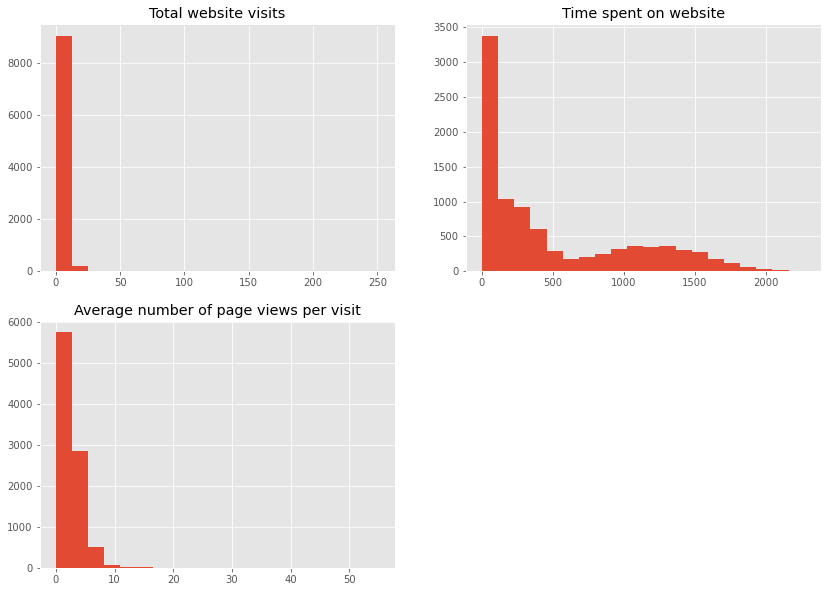

In [215]:
# Set the plotting style to 'ggplot'
plt.style.use('ggplot')

# Visualize the distribution of selected columns
fig = plt.figure(figsize = (14, 10))
plt.subplot(2, 2, 1)
# Plot histogram for total website visits
plt.hist(df.total_visits, bins = 20)
plt.title('Total website visits')

# Plot histogram for time spent on website
plt.subplot(2, 2, 2)
plt.hist(df.time_on_website, bins = 20)
plt.title('Time spent on website')

# Plot histogram for average number of page views per visit
plt.subplot(2, 2, 3)
plt.hist(df.page_views_per_visit, bins = 20)
plt.title('Average number of page views per visit')

# Display the plots
plt.show()

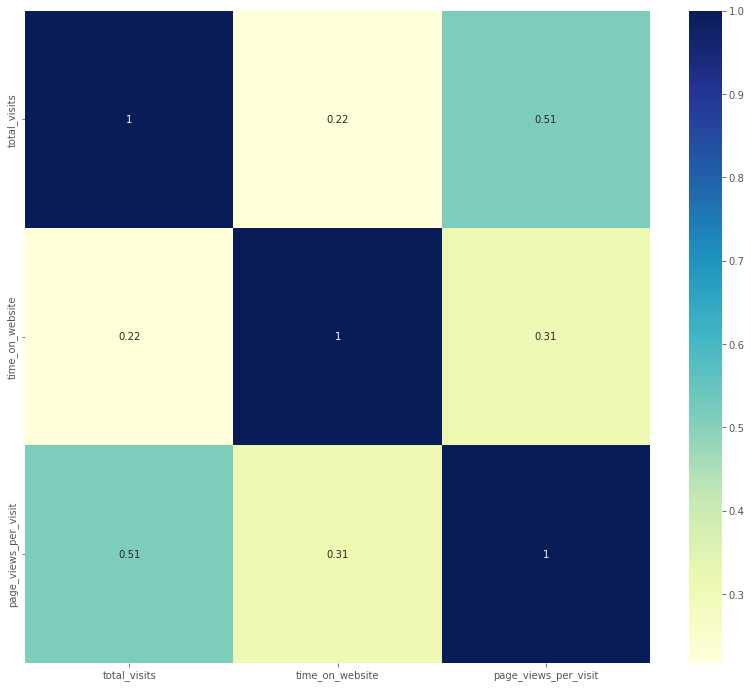

In [216]:
# Set the figure size
plt.figure(figsize = (14,12))

# Create a heatmap to visualize the correlation matrix for selected columns
sns.heatmap(df[['total_visits', 'time_on_website', 'page_views_per_visit']].corr(), cmap="YlGnBu", annot = True)

# Display the heatmap
plt.show()

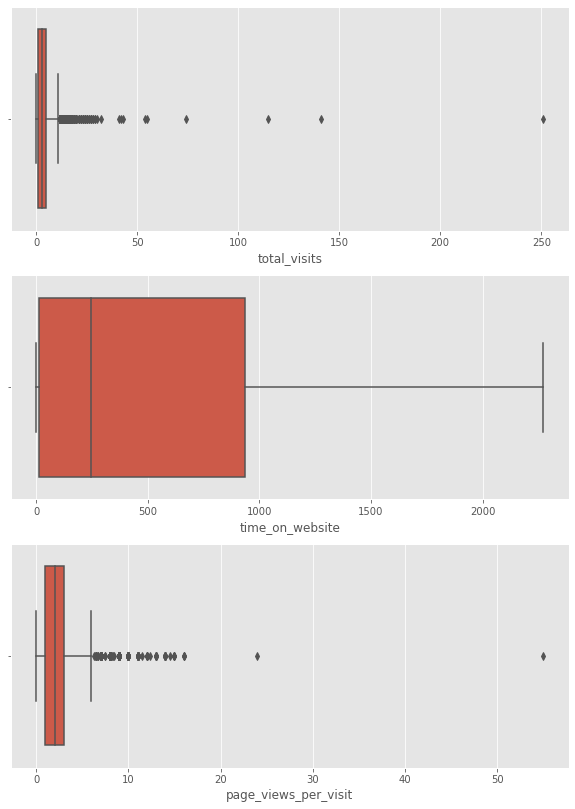

In [217]:
# Set the figure size
plt.figure(figsize = (10, 14))

# Create subplots for boxplots of selected columns
plt.subplot(3,1,1)
sns.boxplot(df.total_visits)

plt.subplot(3,1,2)
sns.boxplot(df.time_on_website)

plt.subplot(3,1,3)
sns.boxplot(df.page_views_per_visit)
plt.show()

### Categorical columns

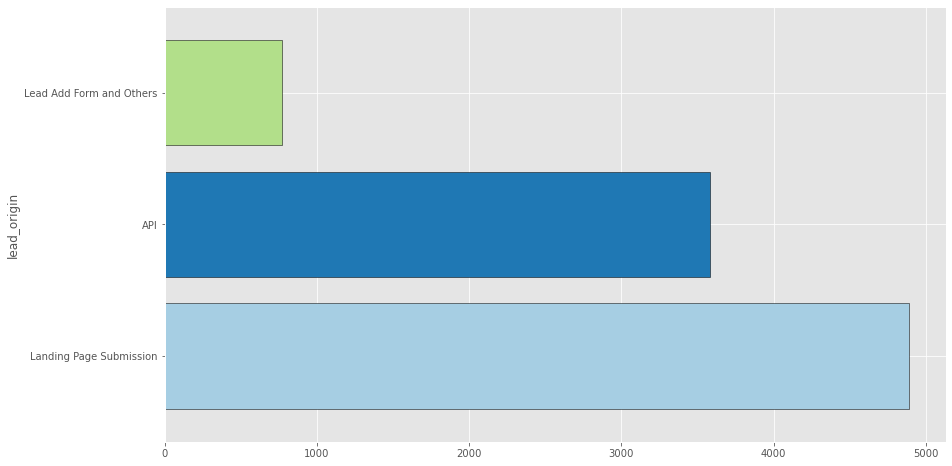

In [218]:
plt.figure(figsize = (14, 8))

df.groupby('lead_origin')['lead_number'].count().sort_values(ascending = False).plot(kind= 'barh', width = 0.8, 
                                                            edgecolor = 'black', 
                                                            color = plt.cm.Paired(np.arange(len(df))))
plt.show()

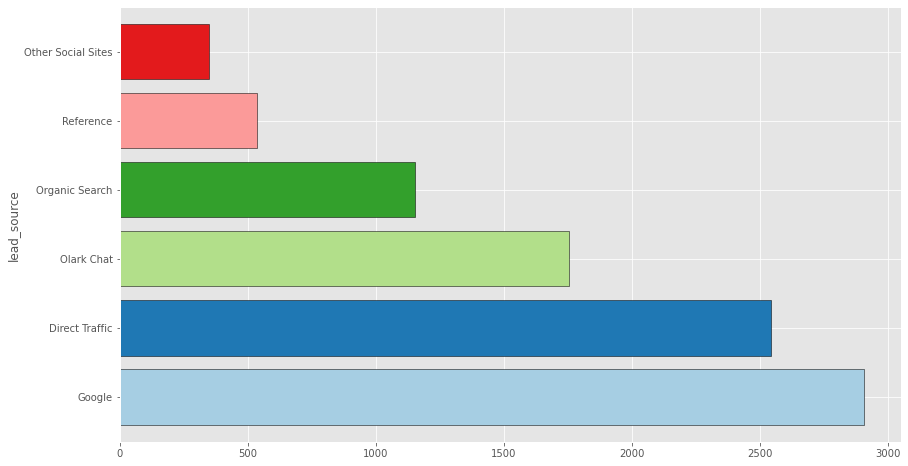

In [219]:
plt.figure(figsize = (14, 8))

df.groupby('lead_source')['lead_number'].count().sort_values(ascending = False).plot(kind= 'barh', width = 0.8, 
                                                            edgecolor = 'black', 
                                                            color = plt.cm.Paired(np.arange(len(df))))
plt.show()

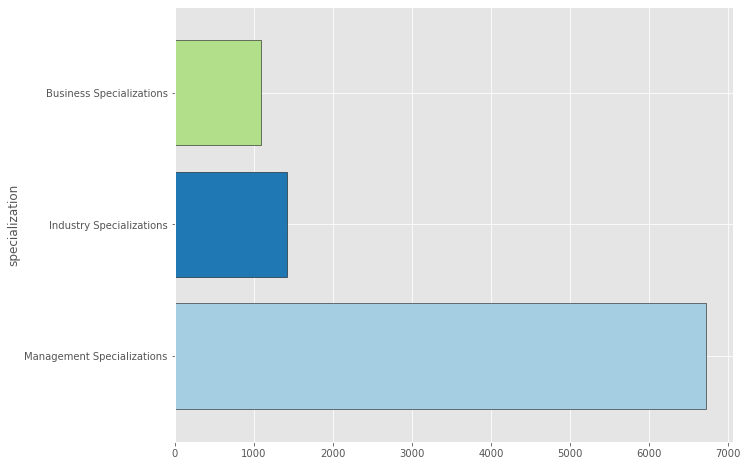

In [220]:
plt.figure(figsize = (10, 8))

df.groupby('specialization')['lead_number'].count().sort_values(ascending = False).plot(kind= 'barh', width = 0.8, 
                                                            edgecolor = 'black', 
                                                            color = plt.cm.Paired(np.arange(len(df))))
plt.show()

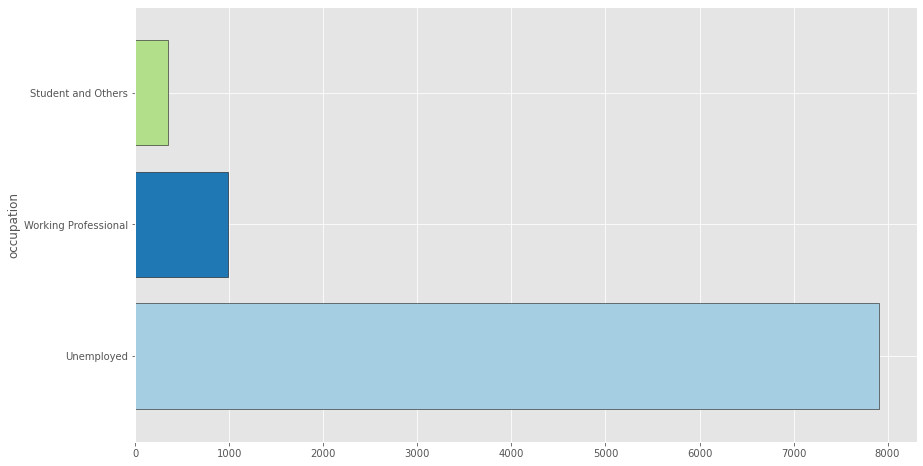

In [221]:
plt.figure(figsize = (14, 8))

df.groupby('occupation')['lead_number'].count().sort_values(ascending = False).plot(kind= 'barh', width = 0.8, 
                                                            edgecolor = 'black', 
                                                            color = plt.cm.Paired(np.arange(len(df))))
plt.show()

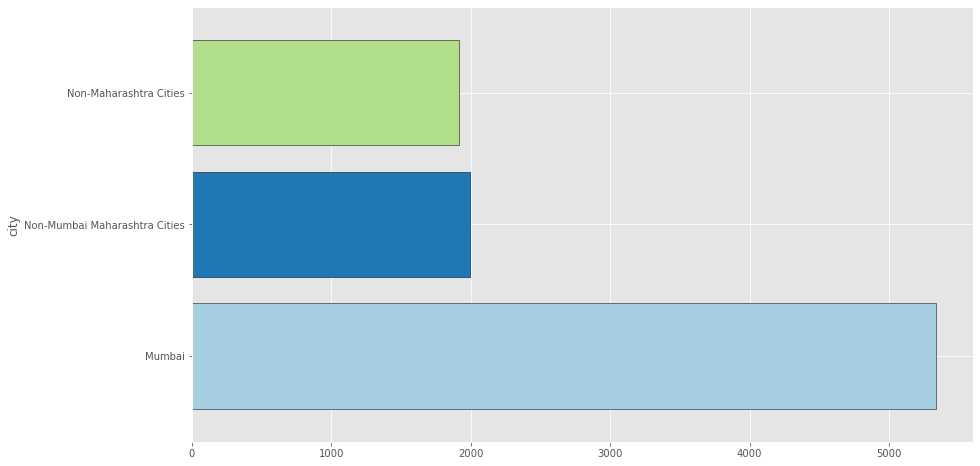

In [222]:
plt.figure(figsize = (14, 8))

df.groupby('city')['lead_number'].count().sort_values(ascending = False).plot(kind= 'barh', width = 0.8, 
                                                            edgecolor = 'black', 
                                                            color = plt.cm.Paired(np.arange(len(df))))
plt.show()

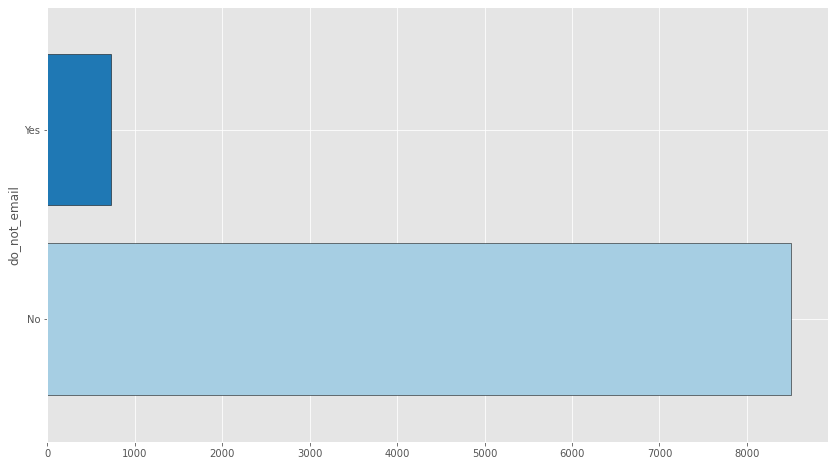

In [223]:
plt.figure(figsize = (14, 8))

df.groupby('do_not_email')['lead_number'].count().sort_values(ascending = False).plot(kind= 'barh', width = 0.8, 
                                                            edgecolor = 'black', 
                                                            color = plt.cm.Paired(np.arange(len(df))))
plt.show()

### Data Preparation

In [224]:
# Display the unique values for each column with object data type
for k, v in df.select_dtypes(include='object').nunique().to_dict().items():
    print('{} = {}'.format(k,v))

lead_number = 9240
lead_origin = 3
lead_source = 6
do_not_email = 2
specialization = 3
occupation = 3
city = 3
mastering_interview = 2


In [225]:
# List of binary columns to map
binlist = ['do_not_email', 'mastering_interview']

# Define the mapping function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Apply the mapping function to the specified binary columns
df[binlist] = df[binlist].apply(binary_map)

# Verify the success of the operation
df.head()

,lead_number,lead_origin,lead_source,do_not_email,converted,total_visits,time_on_website,page_views_per_visit,specialization,occupation,city,mastering_interview
0,660737,API,Olark Chat,0,0,0,0,0.00,Management Specializations,Unemployed,Non-Mumbai Maharashtra Cities,0
1,660728,API,Organic Search,0,0,5,674,2.50,Management Specializations,Unemployed,Non-Mumbai Maharashtra Cities,0
2,660727,Landing Page Submission,Direct Traffic,0,1,2,1532,2.00,Business Specializations,Student and Others,Mumbai,1
3,660719,Landing Page Submission,Direct Traffic,0,0,1,305,1.00,Industry Specializations,Unemployed,Mumbai,0
4,660681,Landing Page Submission,Google,0,1,2,1428,1.00,Management Specializations,Unemployed,Mumbai,0


- Create dummy variables for categorical columns: lead_origin, lead_source, specialization, occupation, city
- To convert categorical variables into a numerical format that can be used in statistical models. In this context, dummy variables are generated for the specified categorical columns (lead_origin, lead_source, specialization, occupation, and city) to represent each category as a binary (0 or 1) value. This transformation allows machine learning models to effectively interpret and utilize categorical information in the dataset, as many algorithms require numerical input.

In [226]:
# Create dummy variables for specified categorical columns and concatenate them with the original dataframe
dummy1 = pd.get_dummies(df[['lead_origin', 'lead_source', 'specialization', 'occupation', 'city']], drop_first = True)

# Adding the results to the master dataframe
df = pd.concat([df, dummy1], axis=1)

In [227]:
# Drop the original categorical columns for which dummy variables have been created
df.drop(['lead_origin', 'lead_source', 'specialization', 'occupation', 'city'], axis = 1, inplace = True)

df.head()

,lead_number,do_not_email,converted,total_visits,time_on_website,page_views_per_visit,mastering_interview,lead_origin_Landing Page Submission,lead_origin_Lead Add Form and Others,lead_source_Google,lead_source_Olark Chat,lead_source_Organic Search,lead_source_Other Social Sites,lead_source_Reference,specialization_Industry Specializations,specialization_Management Specializations,occupation_Unemployed,occupation_Working Professional,city_Non-Maharashtra Cities,city_Non-Mumbai Maharashtra Cities
0,660737,0,0,0,0,0.00,0,0,0,0,1,0,0,0,0,1,1,0,0,1
1,660728,0,0,5,674,2.50,0,0,0,0,0,1,0,0,0,1,1,0,0,1
2,660727,0,1,2,1532,2.00,1,1,0,0,0,0,0,0,0,0,0,0,0,0
3,660719,0,0,1,305,1.00,0,1,0,0,0,0,0,0,1,0,1,0,0,0
4,660681,0,1,2,1428,1.00,0,1,0,1,0,0,0,0,0,1,1,0,0,0


In [228]:
# Selecting numerical columns for analysis
num_cols = df[['total_visits', 'time_on_website', 'page_views_per_visit']]

# Checking for outliers at specific percentiles
# Percentiles provide insights into the distribution of data, helping identify potential outliers
# The selected percentiles include 25%, 50%, 75%, 90%, 95%, and 99%
num_cols.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,total_visits,time_on_website,page_views_per_visit
count,9240.00,9240.00,9240.00
mean,3.44,487.70,2.36
std,4.82,548.02,2.15
min,0.00,0.00,0.00
25%,1.00,12.00,1.00
50%,3.00,248.00,2.00
75%,5.00,936.00,3.00
90%,7.00,1380.00,5.00
95%,10.00,1562.00,6.00
99%,17.00,1840.61,9.00


In [229]:
# Capping at 99 percentile
df.total_visits.loc[df.total_visits >= df.total_visits.quantile(0.99)] = df.total_visits.quantile(0.99)
df.page_views_per_visit.loc[df.page_views_per_visit >= 
                            df.page_views_per_visit.quantile(0.99)] = df.page_views_per_visit.quantile(0.99)

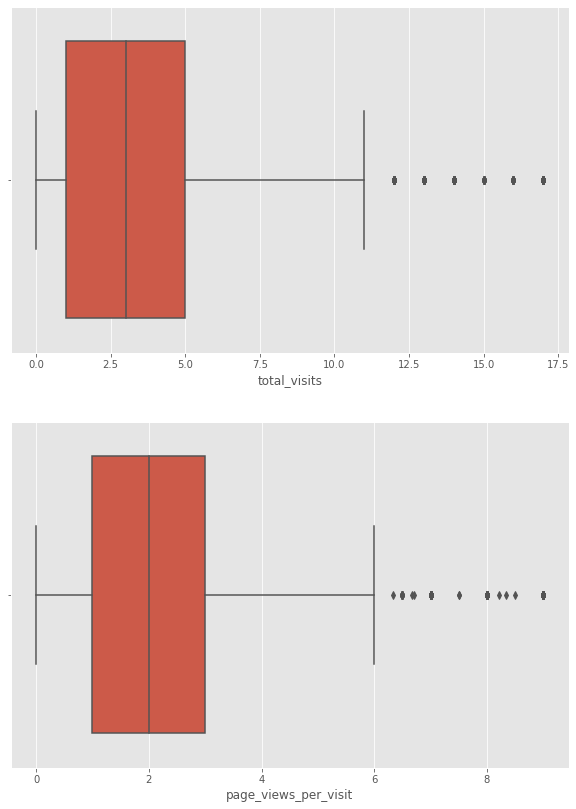

In [230]:
# Set the figure size
plt.figure(figsize = (10, 14))

# Create subplots for boxplots of selected numerical columns
plt.subplot(2,1,1)
sns.boxplot(df.total_visits)

plt.subplot(2,1,2)
sns.boxplot(df.page_views_per_visit)
plt.show()

### Test-Train Split

In [231]:
# Set feature variables by excluding 'lead_number' and 'converted' columns
X = df.drop(['lead_number', 'converted'], axis=1)

# Display the first row of the updated feature variable dataframe
X.head(1)

,do_not_email,total_visits,time_on_website,page_views_per_visit,mastering_interview,lead_origin_Landing Page Submission,lead_origin_Lead Add Form and Others,lead_source_Google,lead_source_Olark Chat,lead_source_Organic Search,lead_source_Other Social Sites,lead_source_Reference,specialization_Industry Specializations,specialization_Management Specializations,occupation_Unemployed,occupation_Working Professional,city_Non-Maharashtra Cities,city_Non-Mumbai Maharashtra Cities
0,0,0,0,0.00,0,0,0,0,1,0,0,0,0,1,1,0,0,1


In [232]:
# Putting response variable to y
y = df['converted']

y.head(1)

0    0
Name: converted, dtype: int64

In [233]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [234]:
scaler = StandardScaler()

X_train[['total_visits','time_on_website','page_views_per_visit']] = scaler.fit_transform(
    X_train[['total_visits','time_on_website','page_views_per_visit']])

X_train.head()

,do_not_email,total_visits,time_on_website,page_views_per_visit,mastering_interview,lead_origin_Landing Page Submission,lead_origin_Lead Add Form and Others,lead_source_Google,lead_source_Olark Chat,lead_source_Organic Search,lead_source_Other Social Sites,lead_source_Reference,specialization_Industry Specializations,specialization_Management Specializations,occupation_Unemployed,occupation_Working Professional,city_Non-Maharashtra Cities,city_Non-Mumbai Maharashtra Cities
1871,0,-1.02,-0.89,-1.18,0,0,0,0,1,0,0,0,0,1,1,0,0,0
6795,0,0.21,0.01,-0.50,1,1,0,0,0,0,0,0,1,0,1,0,1,0
3516,0,0.51,-0.69,0.09,0,0,0,0,1,0,0,0,0,1,1,0,0,0
8105,0,0.51,1.37,1.36,0,1,0,1,0,0,0,0,1,0,1,0,0,0
3934,0,-1.02,-0.89,-1.18,0,0,0,0,1,0,0,0,0,1,1,0,0,0


In [235]:
X_train.describe()

,do_not_email,total_visits,time_on_website,page_views_per_visit,mastering_interview,lead_origin_Landing Page Submission,lead_origin_Lead Add Form and Others,lead_source_Google,lead_source_Olark Chat,lead_source_Organic Search,lead_source_Other Social Sites,lead_source_Reference,specialization_Industry Specializations,specialization_Management Specializations,occupation_Unemployed,occupation_Working Professional,city_Non-Maharashtra Cities,city_Non-Mumbai Maharashtra Cities
count,6468.00,6468.00,6468.00,6468.00,6468.00,6468.00,6468.00,6468.00,6468.00,6468.00,6468.00,6468.00,6468.00,6468.00,6468.00,6468.00,6468.00,6468.00
mean,0.08,-0.00,-0.00,-0.00,0.31,0.53,0.08,0.32,0.19,0.12,0.04,0.06,0.15,0.73,0.85,0.11,0.21,0.21
std,0.27,1.00,1.00,1.00,0.46,0.50,0.28,0.47,0.39,0.33,0.19,0.24,0.36,0.44,0.35,0.31,0.41,0.41
min,0.00,-1.02,-0.89,-1.18,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,-0.72,-0.86,-0.67,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00
50%,0.00,-0.10,-0.44,-0.16,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00
75%,0.00,0.51,0.81,0.35,1.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00
max,1.00,4.20,3.27,3.40,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


#### The conversion rate


In [236]:
# checking the conversion rate
conversion = (sum(df['converted'])/len(df['converted'].index))*100
conversion

38.53896103896104

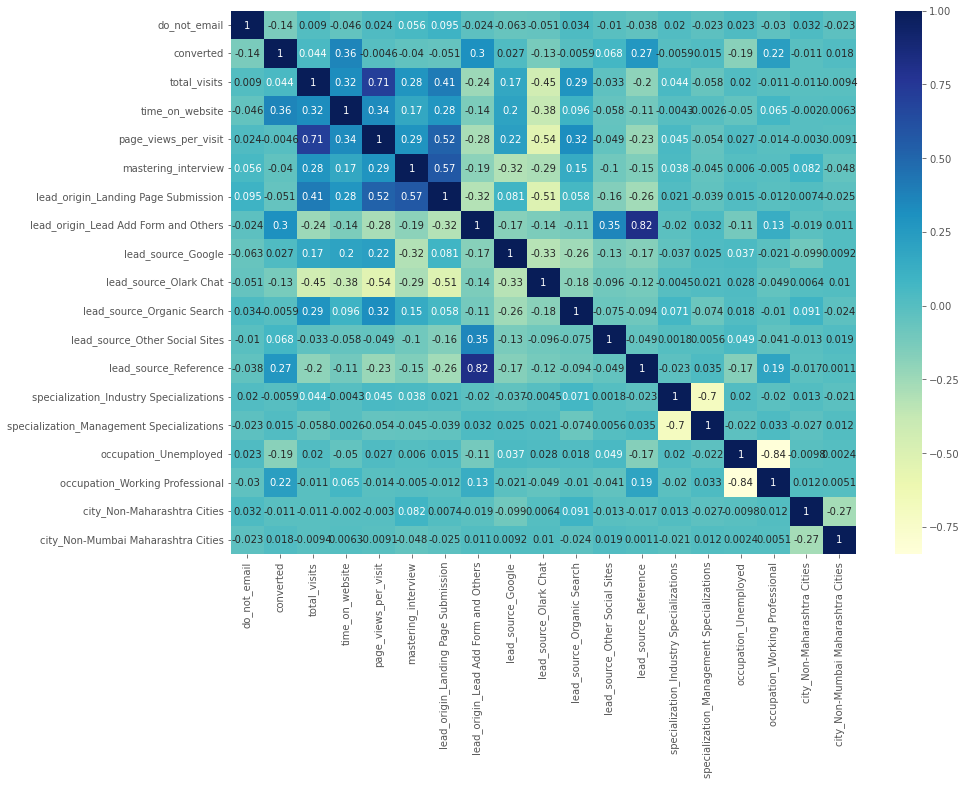

In [237]:
# The correlation matrix 
plt.figure(figsize = (14,10))       
sns.heatmap(df.corr(),annot = True, cmap="YlGnBu")
plt.show()

In [238]:
#  To address multicollinearity or to ensure consistency between the features used in training and testing datasets
X_test.drop(['lead_origin_Lead Add Form and Others', 'specialization_Industry Specializations', 
                     'occupation_Working Professional'], axis = 1, inplace = True)

X_train.drop(['lead_origin_Lead Add Form and Others', 'specialization_Industry Specializations', 
                     'occupation_Working Professional'], axis = 1, inplace = True)

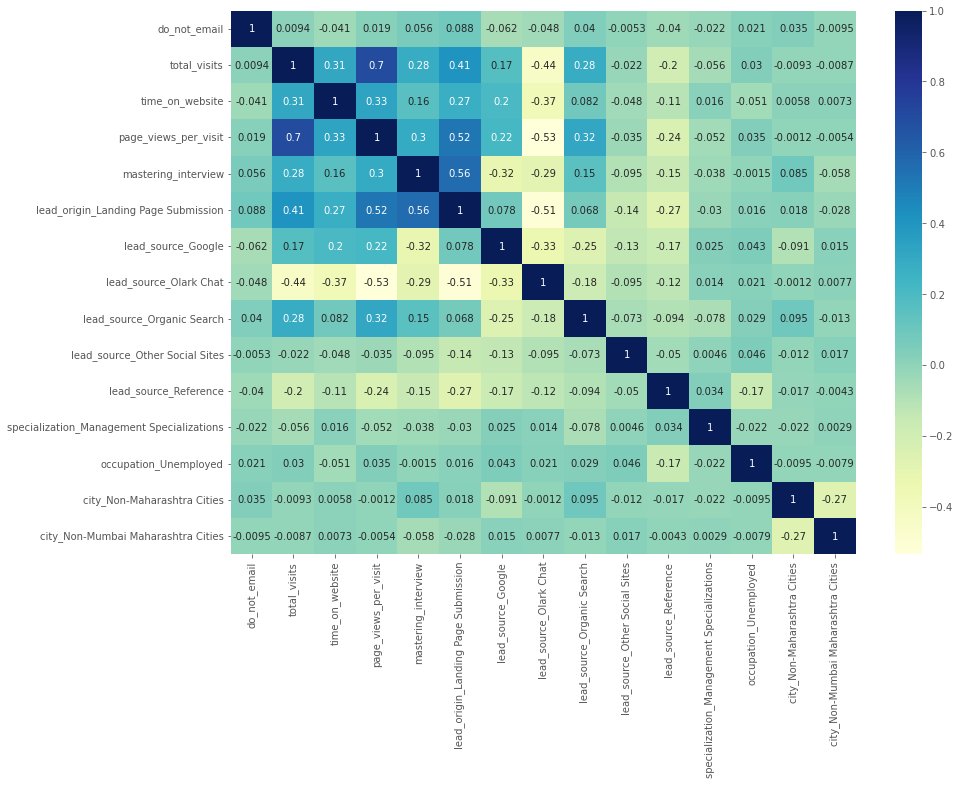

In [239]:
## lets check the correlation matrix again
plt.figure(figsize = (14,10))       
sns.heatmap(X_train.corr(),annot = True, cmap="YlGnBu")
plt.show()

### Model Building

In [240]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3300.5
Date:                Tue, 20 Feb 2024   Deviance:                       6601.0
Time:                        23:13:16   Pearson chi2:                 6.66e+03
No. Iterations:                     5   Pseudo R-squ. (CS):             0.2657
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
const                                        -0.2643      0.146     -1.810      0.070      -0.550       0.022
do_not_email                                 -1.2141      0.144     -8.454      0.000      -1.496      -0.933
total_visits                                  0.1439      0.042      3.436      0.001       0.062       0.226
time_on_website                               1.0431      0.036     29.258      0.000       0.973       1.113
page_views_per_visit                         -0.1840      0.048     -3.800      0.000      -0.279      -0.089
mastering_interview                          -0.0076      0.094     -0.081      0.935      -0.192       0.176
lead_origin_Landing Page Submission          -0.0075      0.092     -0.081      0.935      -0.189       0.174
lead_source_Google                            0.3723      0.100      3.706      0.000       0.175       0.569
lead_source_Olark Chat                        0.6747      0.136      4.943      0.000       0.407       0.942
lead_source_Organic Search                    0.2446      0.116      2.111      0.035       0.018       0.472
lead_source_Other Social Sites                1.6435      0.175      9.376      0.000       1.300       1.987
lead_source_Reference                         3.9566      0.221     17.908      0.000       3.524       4.390
specialization_Management Specializations     0.0171      0.069      0.248      0.804      -0.118       0.152
occupation_Unemployed                        -0.9125      0.085    -10.684      0.000      -1.080      -0.745
city_Non-Maharashtra Cities                   0.0022      0.079      0.028      0.978      -0.152       0.156
city_Non-Mumbai Maharashtra Cities            0.0318      0.076      0.416      0.677      -0.118       0.181
=============================================================================================================
"""

##### GLM Coefficients
- Analyze the absolute value of the regression coefficients in the GLM results. Larger coefficients (positive or negative) indicate a stronger association with the target variable (conversion). Consider features with the highest absolute coefficients (excluding the intercept) as potentially important.

In [241]:
# initiate logistic regression
logreg = LogisticRegression()

In [242]:
# Create the RFE object with the correct arguments
rfe = RFE(estimator=logreg, n_features_to_select=13)  # Pass estimator and n_features_to_select

# Fit the RFE object to the data
rfe = rfe.fit(X_train, y_train)

In [243]:
rfe.support_

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True, False,  True])

In [244]:
# RFE is a feature selection technique that recursively removes the least important features and builds a model until the desired number of features is reached. 
# The method assigns rankings to features based on their elimination order during this process.

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('do_not_email', True, 1),
 ('total_visits', True, 1),
 ('time_on_website', True, 1),
 ('page_views_per_visit', True, 1),
 ('mastering_interview', True, 1),
 ('lead_origin_Landing Page Submission', True, 1),
 ('lead_source_Google', True, 1),
 ('lead_source_Olark Chat', True, 1),
 ('lead_source_Organic Search', True, 1),
 ('lead_source_Other Social Sites', True, 1),
 ('lead_source_Reference', True, 1),
 ('specialization_Management Specializations', False, 2),
 ('occupation_Unemployed', True, 1),
 ('city_Non-Maharashtra Cities', False, 3),
 ('city_Non-Mumbai Maharashtra Cities', True, 1)]

In [245]:
# assign columns
col = X_train.columns[rfe.support_]

In [246]:
# check what columns were not selected by RFE
X_train.columns[~rfe.support_]

Index(['specialization_Management Specializations', 'city_Non-Maharashtra Cities'], dtype='object')

In [247]:
X_train.describe()

,do_not_email,total_visits,time_on_website,page_views_per_visit,mastering_interview,lead_origin_Landing Page Submission,lead_source_Google,lead_source_Olark Chat,lead_source_Organic Search,lead_source_Other Social Sites,lead_source_Reference,specialization_Management Specializations,occupation_Unemployed,city_Non-Maharashtra Cities,city_Non-Mumbai Maharashtra Cities
count,6468.00,6468.00,6468.00,6468.00,6468.00,6468.00,6468.00,6468.00,6468.00,6468.00,6468.00,6468.00,6468.00,6468.00,6468.00
mean,0.08,-0.00,-0.00,-0.00,0.31,0.53,0.32,0.19,0.12,0.04,0.06,0.73,0.85,0.21,0.21
std,0.27,1.00,1.00,1.00,0.46,0.50,0.47,0.39,0.33,0.19,0.24,0.44,0.35,0.41,0.41
min,0.00,-1.02,-0.89,-1.18,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,-0.72,-0.86,-0.67,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
50%,0.00,-0.10,-0.44,-0.16,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00
75%,0.00,0.51,0.81,0.35,1.00,1.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00
max,1.00,4.20,3.27,3.40,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


#### END OF CODE
PLEASE CONTINUE WITH THE PPT FILE